In [4]:
!pip install wikipedia

  Stored in directory: /home/dsxuser/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [6]:
# Start by creating a new Notebook for this assignment.
# setup import
import pandas as pd 
import wikipedia as wp
from bs4 import BeautifulSoup

# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe
# enter the h1 element in wp.page(h1)
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html, header = 0)[0]

# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']

# More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
df = df.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

# Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
df

,Postcode,Borough,Neighborhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [7]:
# In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.
df.shape

(103, 3)

### Segmenting and Clustering Neighborhoods in Toronto Part 2

In [9]:
# Start by creating a new Notebook for this assignment.
# setup import
import wikipedia as wp
import pandas as pd 

import requests
import io

# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe
# enter the h1 element in wp.page(h1)
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html, header = 0)[0]

# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']

# More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
df = df.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

# in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

# rename the first column to allow merging dataframes on Postcode
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

# reorder column names and show the dataframe
df = df[['Postcode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]
df

,Postcode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


## Segmenting and Clustering Neighborhoods in Toronto Part 3

In [11]:
! pip install shapely

     |████████████████████████████████| 1.5MB 5.1MB/s eta 0:00:01�███████████▉                   | 593kB 5.1MB/s eta 0:00:01


In [13]:
! pip install geopandas

     |████████████████████████████████| 921kB 6.0MB/s eta 0:00:01
     |████████████████████████████████| 11.8MB 20.0MB/s eta 0:00:01
     |████████████████████████████████| 10.1MB 18.1MB/s eta 0:00:01


/opt/conda/envs/Python36/lib/python3.6/site-packages/geopandas/plotting.py:510: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


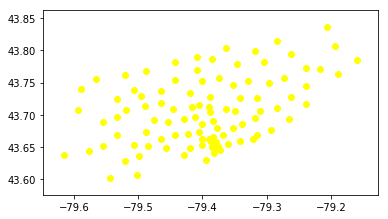

In [15]:


# Start by creating a new Notebook for this assignment.
# setup import
%matplotlib inline

import wikipedia as wp
import pandas as pd 

import requests
import io

from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe
# enter the h1 element in wp.page(h1)
html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

# determine the index of your table
df = pd.read_html(html, header = 0)[0]

# Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
df = df[df.Borough != 'Not assigned']

# More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
df = df.groupby(['Postcode', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

# If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.
for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

# in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.
url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

# rename the first column to allow merging dataframes on Postcode
c.columns = ['Postcode', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postcode')

# reorder column names and show the dataframe
df = df[['Postcode', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]

# load latitude and longitude into geopandas dataframe
df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

# set up map
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='black', edgecolor='green')

# plot and show
gdf.plot(ax=ax, color='yellow')
plt.show()